# 第1部 ベイズの基礎

- 1.1 結合確率，周辺確率，条件付き確率
- 1.2 ベイズの定理
- 1.3 ベイズ更新
- 1.4 コイン投げの公平問題

## 1.1 結合確率，周辺確率，条件付き確率

コイン投げを三回行います．

- H:オモテ，T: ウラ
- 今，「オモテの数」と「面が変わる数」を考えます．
- 数実現可能な可能性は次のとおり．

![alt text](fig/fig1.png "fig1")


### 結合確率

「オモテの数」と「面が変わる数」で集計すると次のような表になる．

![alt text](fig/fig2.png "fig2")

ここで，各セルを「結合確率（または同時確率）」と呼び，以下のように表す．

$$p(x, y)$$

例えば$p(x = 3, y = 0) = 1/8$である．

### 周辺確率

さて，上記の結合確率を表した表において，タテ，ヨコで和をとると次のようになる．

![alt text](fig/fig3.png "fig3")

ここで，タテの和，ヨコの和は「周辺確率」とよび，$p(x)$, $p(y)$と表す．定義はもちろん以下である．

$$
p(x) = \sum_y p(x, y) \\
p(y) = \sum_x p(x, y)
$$

### 条件付き確率

ここで，オモテが一つだけあるという条件の下で，1回だけ面が変わる確率をもとめてみる．

![alt text](fig/fig4.png "fig4")

このようなある条件のもとでの確率は「条件付き確率」といい，

$$
p(y|x)
$$

で表現する．ここでの例では，条件付き確率は$p(y=1|x=1)$と表されて，具体的な計算は以下のようになる．

$$
p(x=1, y=1) = 2/8 \\ 
p(x=1) = \sum_y P(x, y) = 3/8 \\
p(y=1|x=1) = \frac{p(x=1, y=1)}{p(x=1)} \\
 = \frac{(2/8)}{(3/8)} = 2/3
$$

## 1-2 ベイズの定理

結局、結合確率と周辺確率をもちいて条件付き確率を表現できる．
$$
p(y|x) = \frac{p(x, y)}{p(x)} \\
p(x) = \sum_y p(x, y)
$$

以下の恒等式がいえる．
$$
p(y|x) p(x) = p(x, y) \\
p(x|y) p(y) = p(y, x)
$$

上記の恒等式を用いれば，以下のベイズの定理が導出できる．

$$
p(y|x) = \frac{p(x|y) \cdot p(y)}{p(x)} \\
p(x) = \sum_y p(x|y) \cdot p(y)
$$

ここで，べイズの法則が本当に成り立っているかコイン投げ三回の例で確認してみる．具体的には，オモテの数が1回(x=1)かつ面が変わる回数が1回(y=1)の場合，ベイズ則がなりたっているだろうか？

$$
p(y=1|x=1) = \frac{p(x=1|y=1) p(y=1)}{p(x=1)} \\
p(x=1|y=1) = \frac{p(x=1, y=1)}{p(y=1)} = \frac{2/8}{4/8} = 1/2 \\
p(y=1|x=1) = \frac{1/2 \cdot 1/2}{3/8} = 2/3
$$

以上のように無事ベイズ則が成り立っていることがわかる．

いままではx: オモテの数，y: 面が変わる数というようにコイン投げの具体的な確率変数を考えていたが，ここで，$\theta$をパラメータ，$D$をデータとして，$x \rightarrow \theta$, $y \rightarrow D$と置き換えれば，データ解析で用いるベイズ則となる．


$$
p(\theta|D) = \frac{p(D|\theta) \cdot p(\theta)}{p(D)} \\
p(D) = \int d\theta \cdot p(D|\theta) p(\theta)
$$

## 1-3 ベイズ更新

上記のベイズ則ではデータの項目があるので，データを用いて更新を行うことで，よりよい推定が可能になることが期待できる．このことをコイン投げの実験を用いて確認する．

ここでオモテHが出る確率を以下のように表す．

$$
\theta = p(H)
$$

公平なコインならば$\theta = 0.5$であるし，コインがイカサマならば，$\theta = 0.25$や$\theta = 0.75$になっているだろう．

そこで，事前に私たちの主観的な意見として，コインは通常は公平だけれど，0.25や0.75になる可能性も否定できないので，$p(\theta)$として以下のような離散分布を持っていると仮定する．

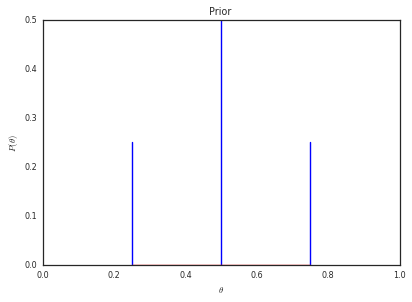

In [3]:
import numpy as np
%matplotlib inline
%precision 4
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('paper')

# To produce the examples in the book, set n_theta_vals to either 3 or 63.
n_theta_vals = 3.
# Now make the vector of theta values:
theta = np.linspace(1/(n_theta_vals +1), n_theta_vals /(n_theta_vals +1), n_theta_vals )

# p_theta is the vector of prior probabilities on the theta values.
p_theta = np.minimum(theta, 1-theta)  # Makes a triangular belief distribution.
p_theta = p_theta / np.sum(p_theta)     # Makes sure that beliefs sum to 1.

# Plot the prior:
plt.stem(theta, p_theta, markerfmt=' ')
plt.xlim(0, 1)
plt.xlabel('$\\theta$')
plt.ylabel('$P(\\theta)$')
plt.title('Prior')

いま，12回コインをなげたとする．すると，オモテが3回だけ出た（つまりウラが9回でた）というデータを得た．このことデータに反映させて，尤度関数p(D|\theta)を表すと，以下のようになる．

$$
p(D|\theta) = \theta^3 (1-\theta)^9
$$

これを，コードで書くと以下の通り．

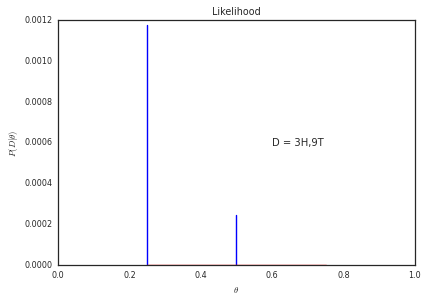

In [4]:
# Specify the data. To produce the examples in the book, use either
# data = np.repeat([1,0], [3, 9]) or data = np.repeat([1,0], [1, 11])
data = np.repeat([1, 0], [3, 9])
n_heads = np.sum(data)
n_tails = len(data) - n_heads

# Compute the likelihood of the data for each value of theta:
p_data_given_theta = theta**n_heads * (1-theta)**n_tails

# Plot the likelihood:
plt.stem(theta, p_data_given_theta, markerfmt=' ')
plt.xlim(0, 1)
plt.xlabel('$\\theta$')
plt.ylabel('$P(D|\\theta)$')
plt.title('Likelihood')
plt.text(0.6, np.max(p_data_given_theta)/2, 'D = %sH,%sT' % (n_heads, n_tails))

上記の事前確率と尤度関数を利用して，ベイズ則で主観的な意見としての確率を更新する．これを「ベイズ更新」という．ベイズ更新により事後確率が求まる．

ベイズ則は

$$
p(\theta|D) = \frac{p(D|\theta) p(\theta)}{p(D)} \\
p(D) = \int d\theta \cdot p(D|\theta) p(\theta)
$$

であるから，これを素直にコード化すると，事後確率は次のようになる．

0.6 0.352716651136 P(D) = 0.000415772


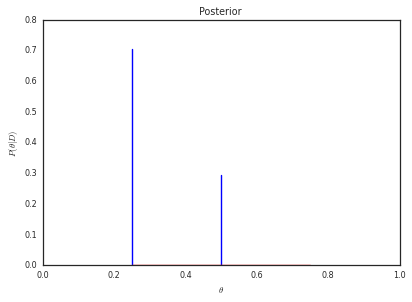

In [5]:
# Compute the posterior:
p_data = np.sum(p_data_given_theta * p_theta)
p_theta_given_data = p_data_given_theta * p_theta / p_data   # This is Bayes' rule!

# Plot the posterior:
plt.stem(theta, p_theta_given_data, markerfmt=' ')
plt.xlim(0, 1)
plt.xlabel('$\\theta$')
plt.ylabel('$P(\\theta|D)$')
plt.title('Posterior')
print(0.6, np.max(p_theta_given_data)/2, 'P(D) = %g' % p_data)

この例では，ベイズ更新により，公平な($\theta=0.5$)な主観的意見が弱まり，公平で無いオモテのでにくい（$\theta=0.25$)信念が強まったと解釈できる．

## 1.4 コイン投げの公平問題

コインを1000回投げてオモテの出る回数を記録する．

まずはランダムに1000回投げるシミュレーションから．

498


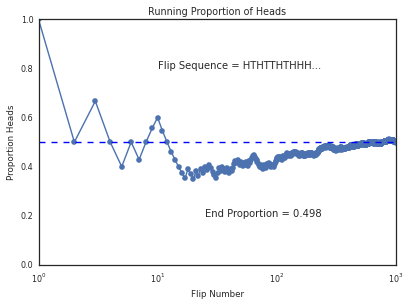

In [6]:
# Specify the total number of flips, denoted N.
N = 1000
# Generate a random sample of N flips for a fair coin (heads=1, tails=0);
np.random.seed(47405)
flip_sequence = np.random.choice(a=(0, 1), p=(.5, .5), size=N, replace=True)
# Compute the running proportion of heads:
r = np.cumsum(flip_sequence)
n = np.linspace(1, N, N)  # n is a vector.
run_prop = r/n  # component by component division.

# Graph the running proportion:
plt.plot(n, run_prop, '-o', )
plt.xscale('log')  # an alternative to plot() and xscale() is semilogx()
plt.xlim(1, N)
plt.ylim(0, 1)
plt.xlabel('Flip Number')
plt.ylabel('Proportion Heads')
plt.title('Running Proportion of Heads')
# Plot a dotted horizontal line at y=.5, just as a reference line:
plt.axhline(y=.5, ls='dashed')

# Display the beginning of the flip sequence.
flipletters = ''
for i in flip_sequence[:10]:
    if i == 1:
        flipletters += 'H'
    else:
        flipletters += 'T'

plt.text(10, 0.8, 'Flip Sequence = %s...' % flipletters)
# Display the relative frequency at the end of the sequence.
plt.text(25, 0.2, 'End Proportion = %s' % run_prop[-1])

print(sum(flip_sequence))

以下の実験から，コインが細工されていない公平なものかどうかをベイズ推定によりチェックすることができる．それが，以下のコードである．詳細は後述する．

 [-----------------100%-----------------] 1000 of 1000 complete in 0.1 sec

Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled)


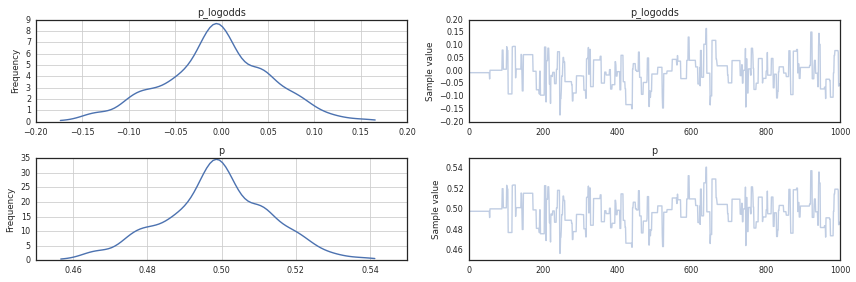

In [7]:
import seaborn as sns
sns.set_style('white')
sns.set_context('paper')

np.random.seed(1234)
import pymc3 as pm
import scipy.stats as stats

n = 1000
h = sum(flip_sequence)
alpha = 2
beta = 2

niter = 1000
with pm.Model() as model: # context management
    # define priors
    p = pm.Beta('p', alpha=alpha, beta=beta)

    # define likelihood
    y = pm.Binomial('y', n=n, p=p, observed=h)

    # inference
    start = pm.find_MAP() # Use MAP estimate (optimization) as the initial state for MCMC
    step = pm.Metropolis() # Have a choice of samplers
    trace = pm.sample(niter, step, start, random_seed=123, progressbar=True)
    pm.traceplot(trace)

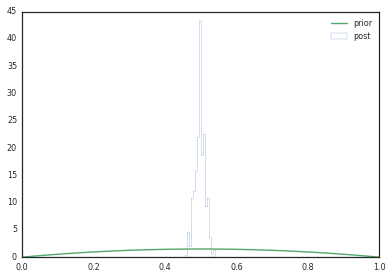

In [34]:
plt.hist(trace['p'], 15, histtype='step', normed=True, label='post');
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x, alpha, beta), label='prior');
plt.legend(loc='best');